In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [2]:
#load the class labels our YOLO model was trained on
labelsPath = '../data/names/obj.names'
LABELS = open(labelsPath).read().strip().split("\n")

In [3]:
#load weights and cfg
weightsPath = '../data/weights/' + 'crop_weed_detection.weights'
configPath = '../data/cfg/crop_weed.cfg'

In [4]:
#color selection for drawing bbox
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

In [5]:
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


In [6]:
#load our input image and grab its spatial dimensions
image = cv2.imread('D:/11.jpg')
(H, W) = image.shape[:2]


In [7]:
#parameters
confi = 0.5
thresh = 0.5

[INFO] YOLO took 0.716633 seconds


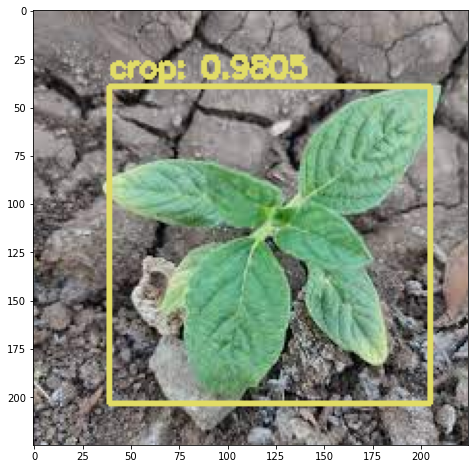

In [8]:
#determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

#construct a blob from the input image and then perform a forward
#pass of the YOLO object detector, giving us our bounding boxes and
#associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (512, 512),swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()

#show timing information on YOLO
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

#initialize our lists of detected bounding boxes, confidences, and
#class IDs, respectively
boxes = []
confidences = []
classIDs = []

#loop over each of the layer outputs
for output in layerOutputs:
	#loop over each of the detections
	for detection in output:
		#extract the class ID and confidence (i.e., probability) of
		#the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		#filter out weak predictions by ensuring the detected
		#probability is greater than the minimum probability
		if confidence > confi:
			#scale the bounding box coordinates back relative to the
			#size of the image, keeping in mind that YOLO actually
			#returns the center (x, y)-coordinates of the bounding
			#box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")

			#use the center (x, y)-coordinates to derive the top and
			#and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))

			#update our list of bounding box coordinates, confidences,
			#and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

#apply non-maxima suppression to suppress weak, overlapping bounding
#boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, confi, thresh)

#ensure at least one detection exists
if len(idxs) > 0:
	#loop over the indexes we are keeping
	for i in idxs.flatten():
		#extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		#draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
det = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(det)

In [9]:
#save detected image 
path = 'detection.jpeg'#change if you want
det = cv2.cvtColor(det,cv2.COLOR_RGB2BGR)
cv2.imwrite(path,det)

True

Creating...D:/output/0.jpg
[INFO] YOLO took 0.468553 seconds
Creating...D:/output/1.jpg
[INFO] YOLO took 0.586066 seconds
Creating...D:/output/2.jpg
[INFO] YOLO took 0.665451 seconds
Creating...D:/output/3.jpg
[INFO] YOLO took 0.507437 seconds
Creating...D:/output/4.jpg
[INFO] YOLO took 0.535099 seconds
Creating...D:/output/5.jpg
[INFO] YOLO took 0.726305 seconds
Creating...D:/output/6.jpg
[INFO] YOLO took 0.501123 seconds
Creating...D:/output/7.jpg
[INFO] YOLO took 0.522847 seconds
Creating...D:/output/8.jpg
[INFO] YOLO took 0.591733 seconds
Creating...D:/output/9.jpg
[INFO] YOLO took 0.525312 seconds
Creating...D:/output/10.jpg
[INFO] YOLO took 0.503481 seconds
Creating...D:/output/11.jpg
[INFO] YOLO took 0.525075 seconds
Creating...D:/output/12.jpg
[INFO] YOLO took 0.510352 seconds
Creating...D:/output/13.jpg
[INFO] YOLO took 0.500943 seconds
Creating...D:/output/14.jpg
[INFO] YOLO took 0.575924 seconds
Creating...D:/output/15.jpg
[INFO] YOLO took 0.577451 seconds
Creating...D:/outp

C:\Users\ACER\AppData\Local\Temp\ipykernel_2968\2261613866.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


[INFO] YOLO took 0.598071 seconds
Creating...D:/output/22.jpg
[INFO] YOLO took 0.624487 seconds
Creating...D:/output/23.jpg
[INFO] YOLO took 0.603736 seconds
Creating...D:/output/24.jpg
[INFO] YOLO took 0.524029 seconds


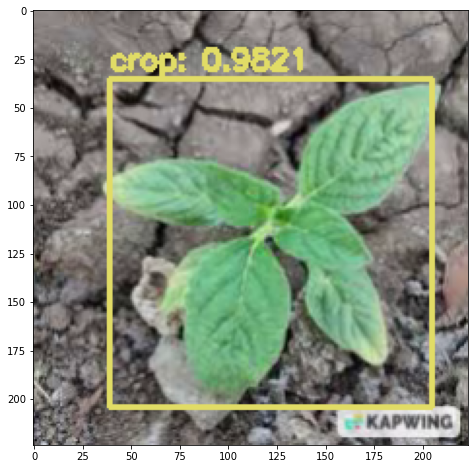

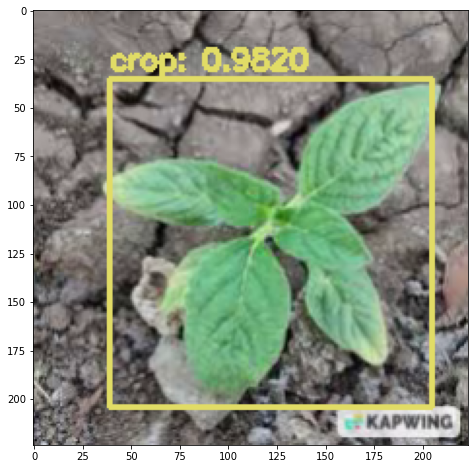

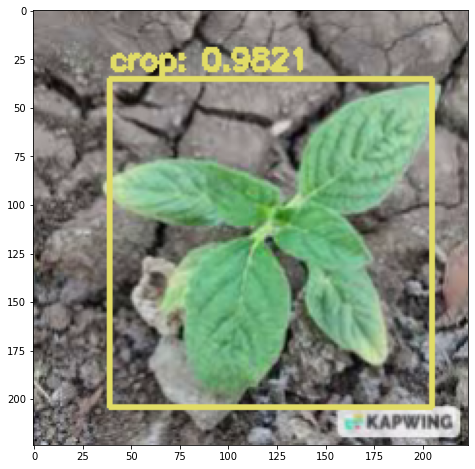

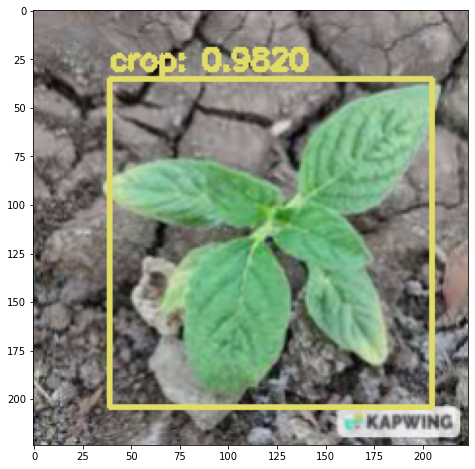

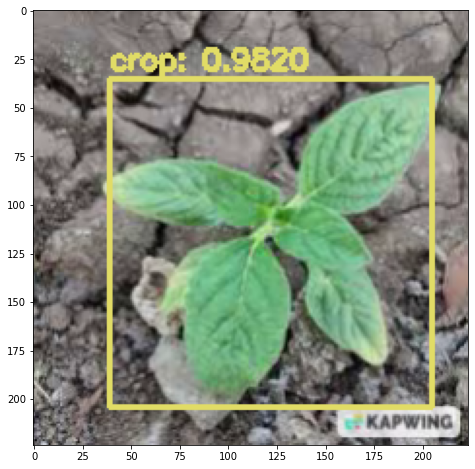

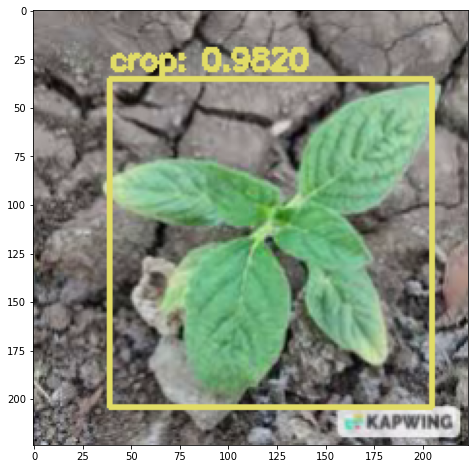

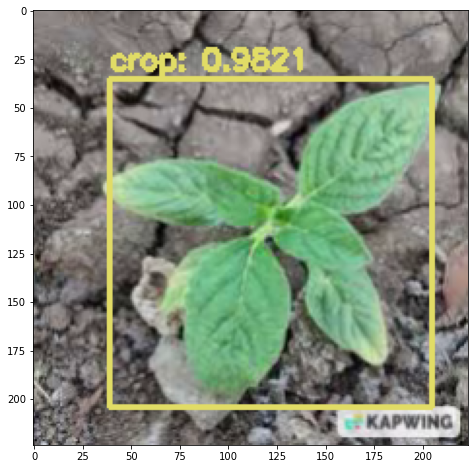

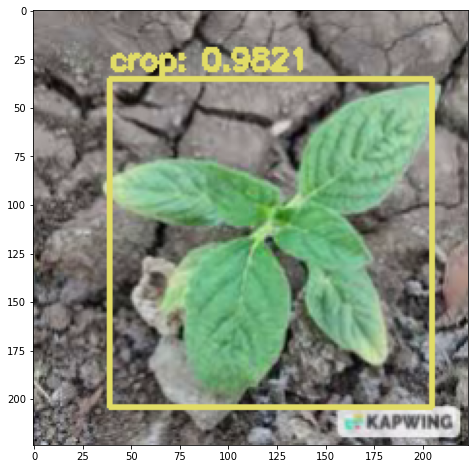

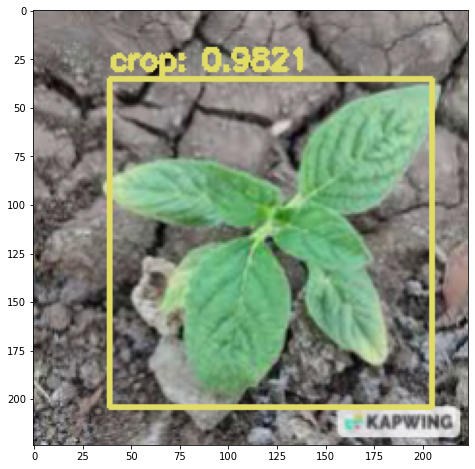

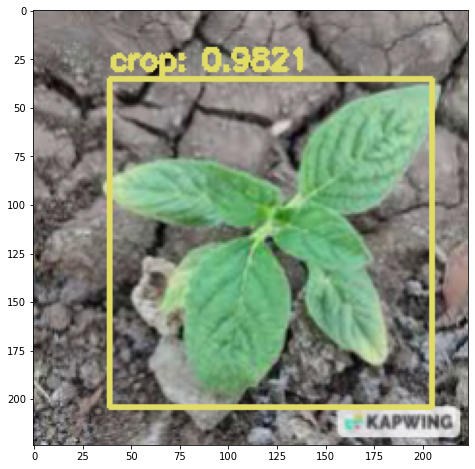

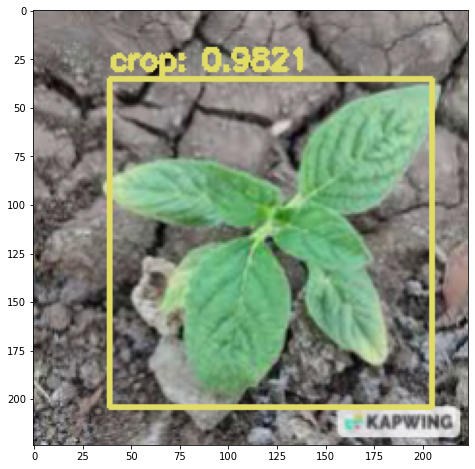

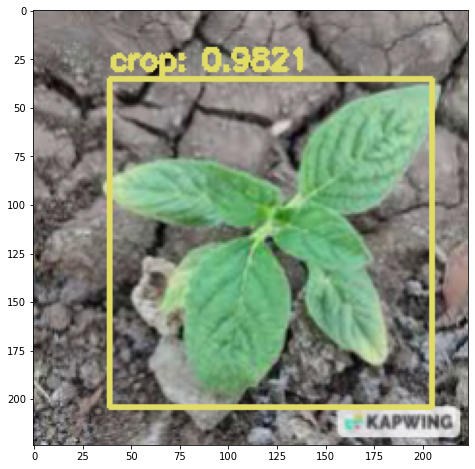

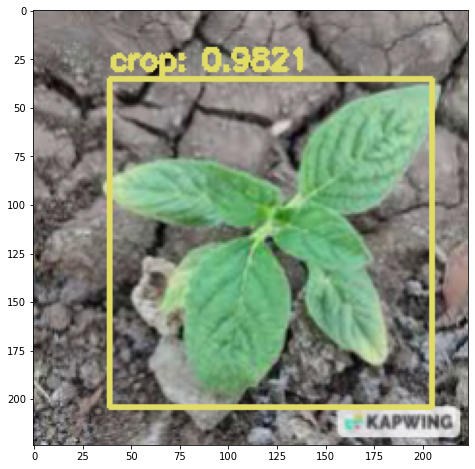

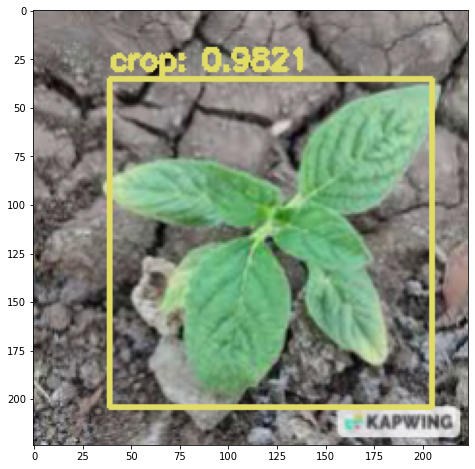

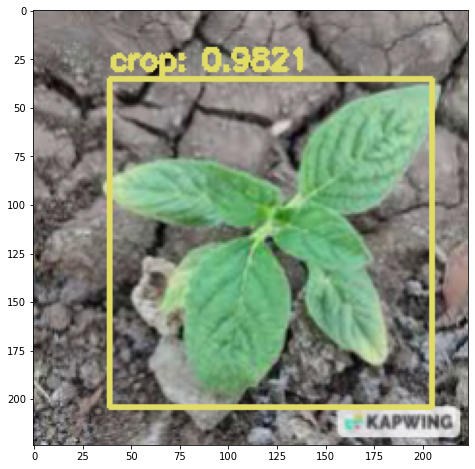

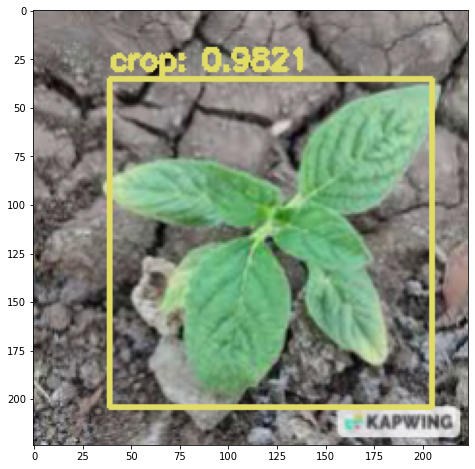

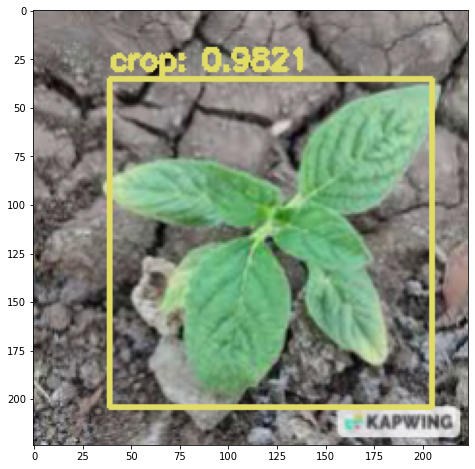

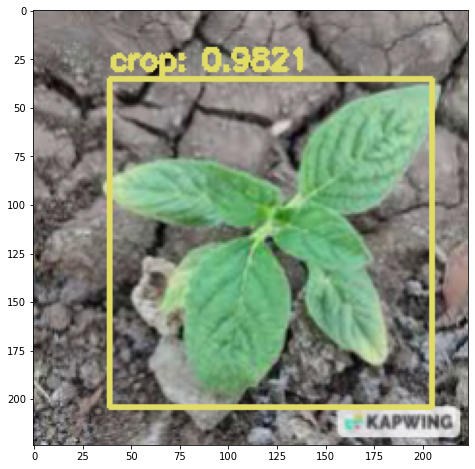

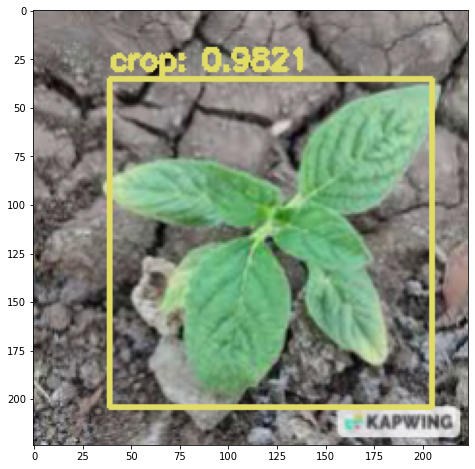

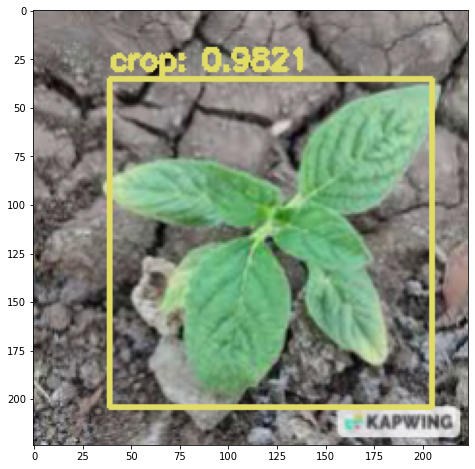

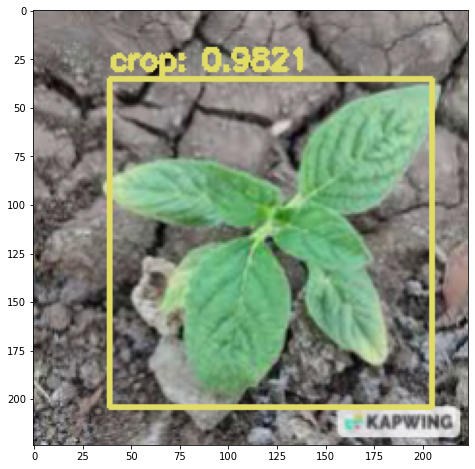

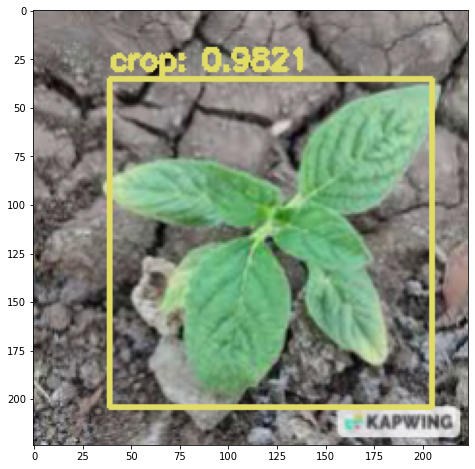

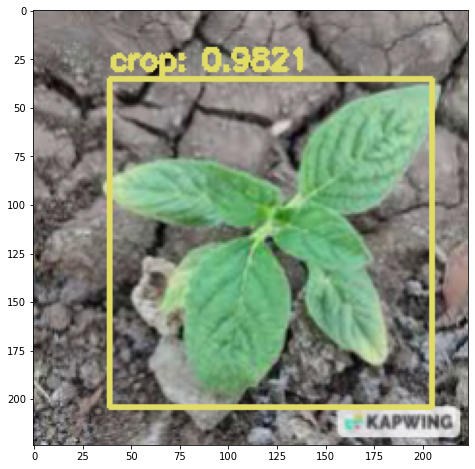

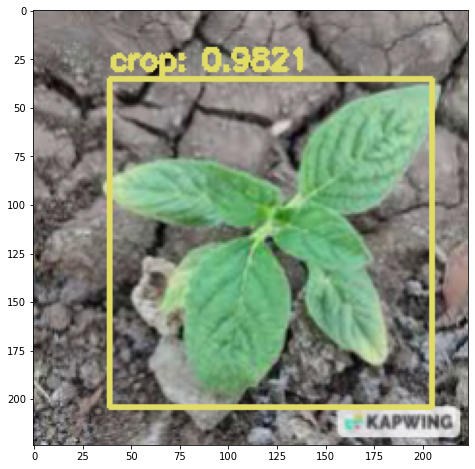

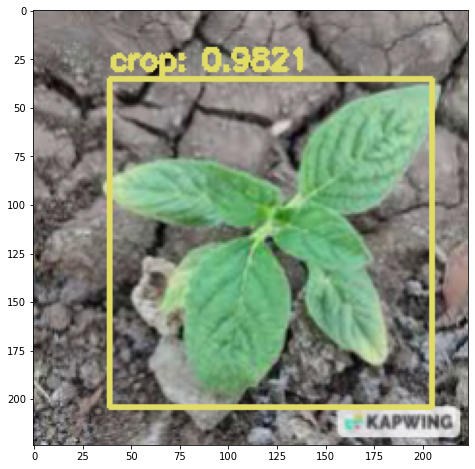

In [10]:

cap = cv2.VideoCapture("C:\\Users\\ACER\\Downloads\\vi.mp4")

currentframe=0

while True:
    ret,imag = cap.read()
  
    if ret:
        # if video is still left continue creating images
        name = 'D:/output/' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, imag)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
    
    (H, W) = imag.shape[:2]
    imag=cv2.resize(imag,(224,224))
    aa=imag
    
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

    #construct a blob from the input image and then perform a forward
    #pass of the YOLO object detector, giving us our bounding boxes and
    #associated probabilities
    blob = cv2.dnn.blobFromImage(imag, 1 / 255.0, (512, 512),swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()

    #show timing information on YOLO
    print("[INFO] YOLO took {:.6f} seconds".format(end - start))

    #initialize our lists of detected bounding boxes, confidences, and
    #class IDs, respectively
    boxes = []
    confidences = []
    classIDs = []

    #loop over each of the layer outputs
    for output in layerOutputs:
        #loop over each of the detections
        for detection in output:
            #extract the class ID and confidence (i.e., probability) of
            #the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            #filter out weak predictions by ensuring the detected
            #probability is greater than the minimum probability
            if confidence > confi:
                #scale the bounding box coordinates back relative to the
                #size of the image, keeping in mind that YOLO actually
                #returns the center (x, y)-coordinates of the bounding
                #box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                #use the center (x, y)-coordinates to derive the top and
                #and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                #update our list of bounding box coordinates, confidences,
                #and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    #apply non-maxima suppression to suppress weak, overlapping bounding
    #boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, confi, thresh)

    #ensure at least one detection exists
    if len(idxs) > 0:
        #loop over the indexes we are keeping
        for i in idxs.flatten():
            #extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            #draw a bounding box rectangle and label on the image
            color = [int(c) for c in COLORS[classIDs[i]]]
            cv2.rectangle(imag, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(imag, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
    det = cv2.cvtColor(imag,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,8))
    plt.imshow(det)
    cv2.imwrite
    if cv2.waitKey(1) == ord('q'):
        break


In [16]:

cap = cv2.VideoCapture("C:\\Users\\ACER\\Downloads\\vi.mp4")
while True:
    success,img=cap.read()
    cv2.imshow("cc",img)
    if cv2.waitKey(1)==ord('q'):
        break

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
